In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #seaborn for data viz
import matplotlib as plt #matplotlib for data viz 
from sklearn.model_selection import KFold # KFold cross-validation method 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from scipy import stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


1. **NumPy** : NumPy is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

2. **Pandas** : Pandas is a popular library for data manipulation and analysis. It provides data structures and functions to easily work with structured data, such as tabular data in the form of DataFrames. It also offers convenient methods for reading and writing data from various file formats, such as CSV.

3. **Seaborn** : Seaborn is a Python data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating common visualizations like scatter plots, histograms, bar plots, etc., and also provides additional functionality for visualizing statistical relationships.

4. **Matplotlib** : Matplotlib is a widely-used plotting library in Python. It offers a comprehensive collection of functions and classes for creating a wide variety of plots, including line plots, bar plots, scatter plots, histograms, and more. The pyplot module provides a simple and convenient interface to create and customize plots.

5. **Scikit-learn** : Scikit-learn is a popular machine learning library in Python that provides a wide range of tools for various machine learning tasks, such as classification, regression, clustering, and dimensionality reduction. It includes modules for data preprocessing, model selection, evaluation metrics, and many commonly used machine learning algorithms.

- > **KFold** : KFold is a class in scikit-learn that implements k-fold cross-validation. It divides the dataset into k equal-sized folds and provides indices to split the data into training and validation sets for cross-validation.

- > **StandardScaler**: StandardScaler is a class in scikit-learn that provides a convenient way to standardize features by subtracting the mean and scaling to unit variance. It is often used in preprocessing pipelines to ensure that features are on a similar scale.

- > **accuracy_score**, **log_loss** : These are evaluation metrics in scikit-learn commonly used for classification tasks. **accuracy_score** calculates the accuracy of a classification model's predictions, while **log_loss** computes the logarithmic loss or cross-entropy loss for probabilistic predictions.

- > **LogisticRegression** : LogisticRegression is a class in scikit-learn that implements logistic regression, which is a popular algorithm for binary classification. It models the relationship between input features and a binary target variable using a logistic function.

- > **RandomForestClassifier** : RandomForestClassifier is a class in scikit-learn that implements the random forest algorithm. Random forests are an ensemble learning method that combines multiple decision trees to make predictions. They are effective for both classification and regression tasks and are known for their robustness and ability to handle high-dimensional data.

- > **f1_score** : f1_score is a metric used to evaluate the performance of a binary classification model. It calculates the harmonic mean of precision and recall, providing a single score that balances both metrics. The F1 score considers both false positives and false negatives and is useful when the class distribution is imbalanced. A higher F1 score indicates better model performance, with a maximum value of 1. The formula for F1 score is:

$$F_{1} = 2 \cdot \frac{\text{ precision } \cdot \text{ recall }}{\text{ precision }+\text{ recall }} = \frac{\mathrm{TP}}{\mathrm{TP} + \frac{1}{2}(\text{FP} + \mathrm{FN})}$$

$$TP = number~of~true~positives$$

$$FP = number~of~false~positives$$

$$FN = number~of~false~negative$$

6. **XGBClassifier**: XGBClassifier is a class in the XGBoost library, which is an optimized gradient boosting framework. XGBoost is known for its high performance and is widely used for both classification and regression tasks.

7. **scipy** : is a powerful scientific computing library in Python that provides various functions for scientific and technical computing.
The stats module in scipy is a submodule that includes a wide range of statistical functions and probability distributions.
It offers many statistical tests, such as the Shapiro-Wilk test and the Anderson-Darling test, for assessing the distribution of data.
The stats module also provides functions for calculating descriptive statistics, fitting probability distributions, performing hypothesis testing, and much more.
By importing this module, you can access these statistical functions and tests to perform statistical analysis on your data.

In [2]:
heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
saturation = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")

* Description of heart dataset: This dataset contains information related to heart health and features that can be used to predict the likelihood of a heart attack. It includes columns such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise, the slope of the peak exercise ST segment, number of major vessels, thalassemia, and the target variable indicating the presence of a heart attack.

* Description of Oxygen Saturation Dataset or saturation: This dataset contains oxygen saturation levels measured for different patients at different times. It includes a single column representing the oxygen saturation readings.

In [3]:
#head of heart 
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This represents the first 5 rows of the "heart" DataFrame. Each row corresponds to a specific individual, and the columns represent different features such as age, sex, chest pain type (cp), resting blood pressure (trtbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalachh), exercise-induced angina (exng), ST depression induced by exercise relative to rest (oldpeak), slope of the peak exercise ST segment (slp), number of major vessels (caa) colored by fluoroscopy, thallium stress test result (thall), and the target variable (output) indicating the presence (1) or absence (0) of a heart disease.

In [4]:
#head of saturation
saturation.head()


,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


This represents the first 5 rows of the "saturation" DataFrame. Each row corresponds to a specific measurement of oxygen saturation, represented by the "saturation" column.


In [5]:
# Summary statistics of  heart
print(heart.describe().T)


          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277

These statistics represent the descriptive summary of each column in the "heart" DataFrame. Here's an explanation of each statistic:

**count**: The number of non-null values in each column.

**mean**: The average value of each column.

**std**: The standard deviation of each column, which measures the dispersion or spread of the data.

**min**: The minimum value in each column.

**25%**: The 25th percentile or the value below which 25% of the data falls.

**50%**: The median or the value below which 50% of the data falls.

**75%**: The 75th percentile or the value below which 75% of the data falls.

**max**: The maximum value in each column.
Here's the breakdown of each column's statistics:

**age**: The average age of the individuals is approximately 54.4 years, with a standard deviation of 9.1. The age ranges from 29 to 77.

**sex**: The majority of individuals are male (1: male, 0: female). The mean represents the proportion of males in the dataset, which is approximately 0.68.

**cp**: The chest pain type ranges from 0 to 3, with an average value of approximately 1.0. It represents the severity of chest pain experienced by individuals.

**trtbps**: The resting blood pressure ranges from 94 to 200 mm Hg, with an average value of approximately 131.6 mm Hg.

**chol**: The cholesterol level ranges from 126 to 564 mg/dl, with an average value of approximately 246.3 mg/dl.

**fbs**: The majority of individuals have a fasting blood sugar level of 0 (<= 120 mg/dl). The mean represents the proportion of individuals with a fasting blood sugar level greater than 120 mg/dl, which is approximately 0.15.

**restecg**: The resting electrocardiographic results range from 0 to 2. The mean represents the average value of the results, which is approximately 0.53.

**thalachh**: The maximum heart rate achieved ranges from 71 to 202 beats per minute, with an average value of approximately 149.6.

**exng**: The majority of individuals do not have exercise-induced angina (0: No, 1: Yes). The mean represents the proportion of individuals with exercise-induced angina, which is approximately 0.33.

**oldpeak**: The ST depression induced by exercise relative to rest ranges from 0 to 6.2. The mean value is approximately 1.0.

**slp**: The slope of the peak exercise ST segment ranges from 0 to 2. The mean value is approximately 1.4.

**caa**: The number of major vessels colored by fluoroscopy ranges from 0 to 4, with an average value of approximately 0.73.

**thall**: The thallium stress test result ranges from 0 to 3. The mean value is approximately 2.31.

**output**: The target variable indicating the presence (1) or absence (0) of a heart disease. The mean represents the proportion of individuals with a heart disease, which is approximately 0.54.

In [6]:
# Summary statistics of saturation
print(saturation.describe().T)

       count       mean       std   min   25%   50%   75%   max
98.6  3585.0  98.239275  0.726336  96.5  97.6  98.6  98.6  99.6


In [7]:
# Check data types and missing values
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


 This provides a summary of the DataFrame's structure, including the number of entries, the total number of columns, and the data types of each column.

Here's an explanation of the information displayed:

- RangeIndex: It shows that the DataFrame has 303 entries, ranging from index 0 to 302.
- Data columns: It displays the column names and additional information about each column.
- Column: It lists the column names.
- Non-Null Count: It indicates the number of non-null values in each column, which is 303 for all columns, indicating that there are no missing values.
- Dtype: It shows the data type of each column. In this case, most columns are of type int64, representing integer values, and one column is of type float64, representing floating-point numbers.
- Memory Usage: It indicates the memory usage of the DataFrame, which is approximately 33.3 KB.


In [8]:
#change the data type of all heart features 
heart = heart.astype('float')

This will convert all the columns in the "heart" DataFrame to float data type. Now, all the features in the "heart" DataFrame will have a data type of float.


In [9]:
## Check data types and missing values
print(saturation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB
None


In [10]:
#rename the '98.6' column to be 
saturation = saturation.rename(columns={'98.6': 'OxygenSaturation'})


This will rename the '98.6' column in the "saturation" DataFrame to 'OxygenSaturation'. Now, you can refer to the column as 'OxygenSaturation' in your code.

<AxesSubplot: xlabel='OxygenSaturation', ylabel='Count'>

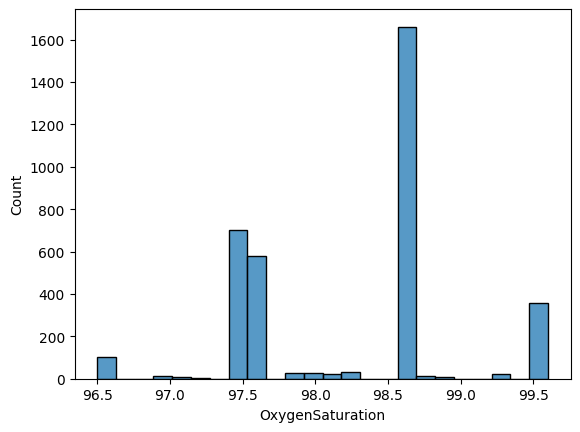

In [11]:
# Visualize the distribution of the oxygen saturation levels
sns.histplot(data=saturation, x='OxygenSaturation')


Text(0, 0.5, 'Frequency')

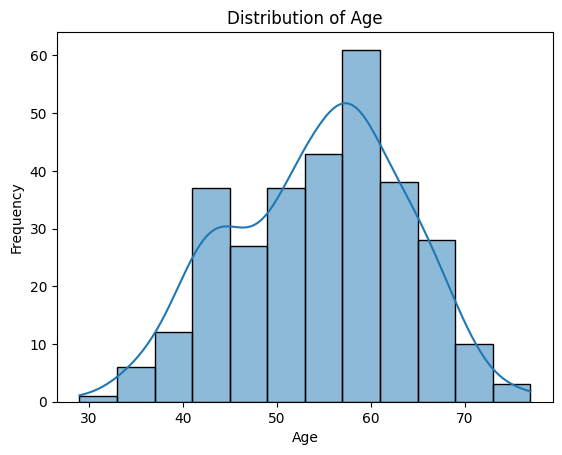

In [12]:
# Histogram of age

ax = sns.histplot(data=heart, x='age', kde=True)
ax.set_title('Distribution of Age')
ax.set_xlabel('Age') 
ax.set_ylabel('Frequency')


In [13]:
age = heart['age']

# Shapiro-Wilk test
shapiro_test = stats.shapiro(age)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test:
Test Statistic: 0.9863710999488831
p-value: 0.005800189916044474


The Shapiro-Wilk test is a statistical test that helps us determine whether a given dataset follows a normal distribution or not. The normal distribution is a common distribution in statistics where the data is symmetrically distributed around the mean.

When we perform the Shapiro-Wilk test on a dataset, we obtain two important values:

Test Statistic: This is a number that measures how different the dataset is from a normal distribution. A value close to 1 suggests that the dataset is similar to a normal distribution.

- p-value: This is a probability value that tells us how likely it is to observe the test statistic if the dataset follows a normal distribution. A lower p-value indicates that the dataset is significantly different from a normal distribution.

Now, let's look at the results you provided:

- Test Statistic: 0.9863710999488831
- p-value: 0.005800189916044474
In simple terms, the test statistic of 0.9863710999488831 suggests that the dataset is somewhat similar to a normal distribution. However, the p-value of 0.005800189916044474 is quite small, indicating that it is unlikely to observe this test statistic if the dataset truly follows a normal distribution.

Based on these results, we would conclude that age only does not follow a normal distribution. In other words, the age does not have a symmetric distribution around the mean, which is characteristic of a normal distribution.

It's important to remember that the Shapiro-Wilk test has assumptions and limitations, and the interpretation of the results should be considered in the context of the analysis and the chosen significance level.

Text(0, 0.5, 'Cholesterol')

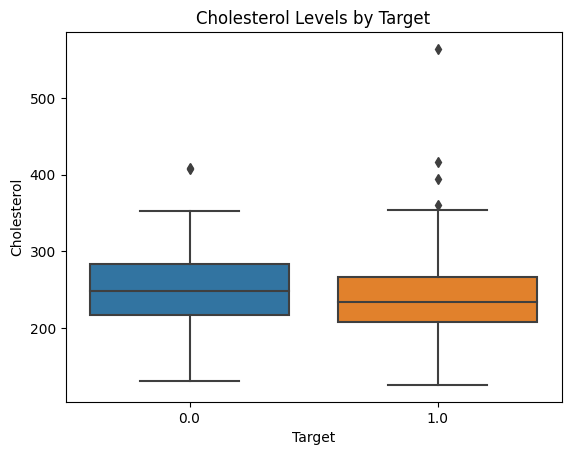

In [14]:
# Box plot of cholesterol by target
box = sns.boxplot(x='output', y='chol', data=heart)
box.set_title('Cholesterol Levels by Target')
box.set_xlabel('Target')
box.set_ylabel('Cholesterol')


- sns.boxplot() is a function from the seaborn library that creates a box plot.
- x='output' specifies that the x-axis of the plot represents the 'output' variable from the 'heart' dataset.
- y='chol' indicates that the y-axis represents the 'chol' variable from the 'heart' dataset.
- data=heart specifies the 'heart' dataset to be used for creating the plot.
- box.set_title('Cholesterol Levels by Target') sets the title of the plot as 'Cholesterol Levels by Target'.
- box.set_xlabel('Target') sets the label for the x-axis as 'Target'.
- box.set_ylabel('Cholesterol') sets the label for the y-axis as 'Cholesterol'.
- the '1' in  Target(Output) in terms of Cholesterol shows some outlires

Text(0, 0.5, 'Count')

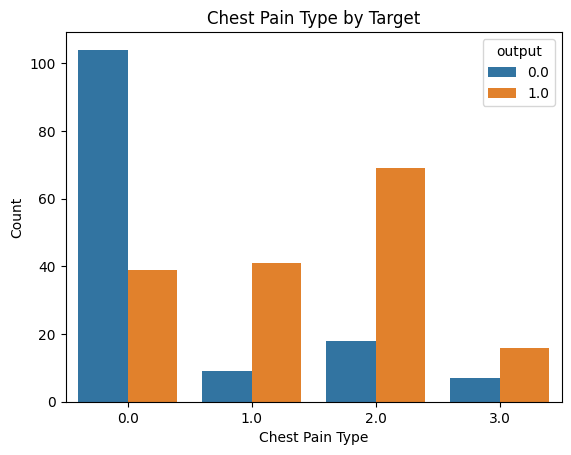

In [15]:
# Bar plot of chest pain type by target
coun = sns.countplot(x='cp', hue='output', data=heart)
coun.set_title('Chest Pain Type by Target')
coun.set_xlabel('Chest Pain Type')
coun.set_ylabel('Count')

This shows the four categories of chest pain type typically found in the dataset are:

- Typical angina (Value: 0): This type of chest pain is usually caused by a temporary decrease in blood flow to the heart muscle. It is described as a discomfort or pressure in the chest that is predictable and triggered by physical activity or stress. The pain typically subsides with rest or medication.

 - Atypical angina (Value: 1): This category includes chest pain that is different from typical angina. It may still be related to reduced blood flow to the heart but does not follow the typical pattern. The pain may be less intense or have different characteristics than typical angina.

 - Non-anginal pain (Value: 2): This category represents chest pain that is not related to reduced blood flow to the heart. It could be caused by various factors such as musculoskeletal issues, gastrointestinal problems, or anxiety.

 - Asymptomatic (Value: 3): This category is for individuals who do not experience any chest pain symptoms. They may have other indicators of heart disease or risk factors but do not report any chest pain.

Text(0.5, 1.0, 'Distribution of Target Variable')

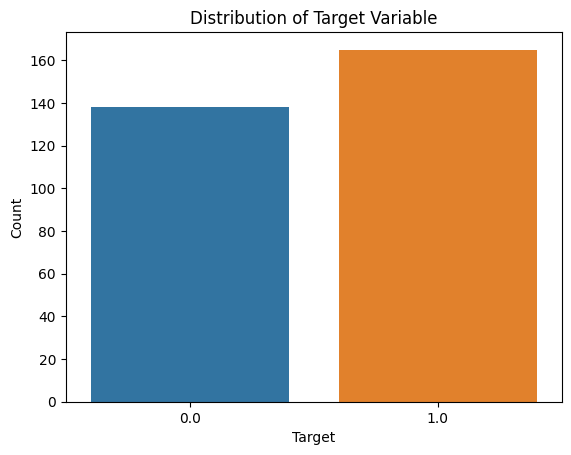

In [16]:
ax = sns.countplot(x='output', data=heart)
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Distribution of Target Variable')


The interpretation of the 'output' variable is as follows:

- 0: Indicates the absence of heart disease. This means that the patient does not have heart disease according to the criteria used in the dataset.

- 1: Indicates the presence of heart disease. This means that the patient has been diagnosed with heart disease based on the criteria used in the dataset.

Text(0.5, 1.0, 'Scatter Plot of Age vs Cholesterol with Categorized Data')

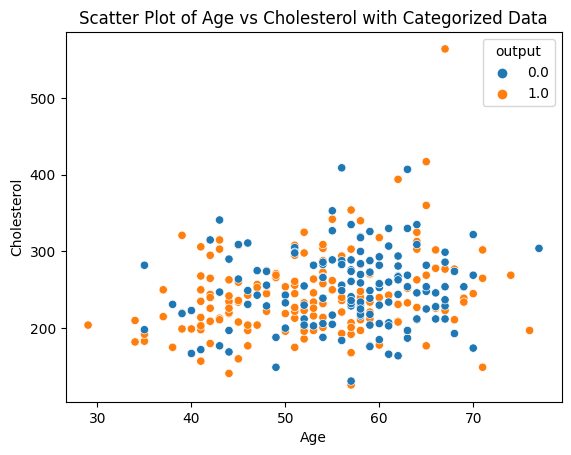

In [17]:
ax = sns.scatterplot(data=heart, x='age', y='chol', hue='output')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_title('Scatter Plot of Age vs Cholesterol with Categorized Data')


The resulting scatter plot visualizes the relationship between Age and Cholesterol levels, with the points colored based on output whether the patient has heart disease (1) or not(0). It allows for a visual inspection of any potential patterns or trends between these variables and the presence of heart disease.

Text(0.5, 1.0, 'Scatter Plot of Age vs oldpeak with Categorized Data')

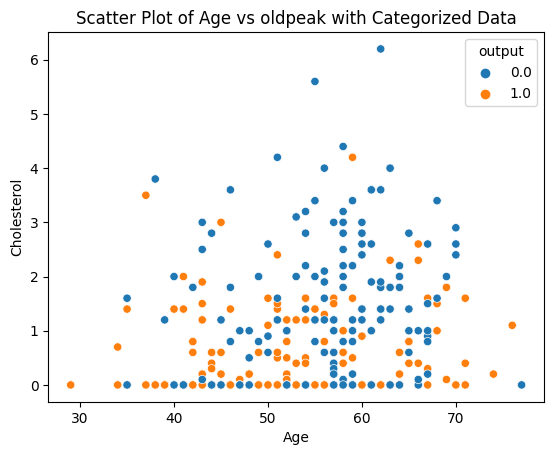

In [18]:
ax = sns.scatterplot(data=heart, x='age', y='oldpeak', hue='output')
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_title('Scatter Plot of Age vs oldpeak with Categorized Data')


'oldpeak' is a feature in the heart dataset that quantifies the ST segment depression observed during exercise and can serve as an indicator of the presence and severity of coronary artery disease.
The figure observed the relationship between age and oldpeak for different categories of the output variable. 

In [19]:
#make corr 
corr = heart.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


This will display the correlation matrix, showing the correlation coefficients between each pair of variables in the heart dataset. The values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation between the variables.

In [20]:
# Separate the features (X) and the target variable (y)
X = heart.drop('output', axis=1)
y = heart['output']

- **X**: Create a new DataFrame containing all the columns except the 'output' column. It represents the features or independent variables that will be used to predict the target variable.

- **y** : represents the target variable or the variable that we want to predict. in this case is output and it contains the labels or classes that correspond to each set of features in X



In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

Initilaze the scaler object and it is preprocessing technique in machine learning that is used to standardize features by removing the mean and scaling to unit variance. It is a common practice to apply feature scaling to numeric features before training a machine learning model. By scaling the features, you ensure that they are on a similar scale, which can improve the performance of many machine learning algorithms.

In [22]:
#Standardize the features in X
X_scaled = scaler.fit_transform(X)


In [23]:
# Define a function for cross-validation and model evaluation
def cross_val_evalute(model, X, y): 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    log_losses = []
    
    # Perform cross-validation
    for train_index, test_index in kf.split(X):
        X_train,  X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy score and log loss
        accuracy = accuracy_score(y_test, y_pred)
        logloss = log_loss(y_test, y_pred)

        # Append accuracy score and log loss to the lists
        accuracy_scores.append(accuracy)
        log_losses.append(logloss)
        

        
    # Calculate the mean accuracy score and log loss
    mean_accuracy = np.mean(accuracy_scores)
    mean_logloss = np.mean(log_losses)

    return mean_accuracy, mean_logloss, 

# Instantiate the models
lr_model = LogisticRegression()
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, objective='binary:logistic')
rf_model = RandomForestClassifier(criterion= "entropy",max_depth=3)

# Perform cross-validation and evaluate the models
lr_accuracy, lr_logloss = cross_val_evalute(lr_model, X_scaled, y)
xgb_accuracy, xgb_logloss = cross_val_evalute(xgb_model, X_scaled, y)
rf_accuracy, rf_logloss = cross_val_evalute(rf_model, X_scaled, y)


# Calculate F1 scores
lr_model.fit(X_scaled, y)
lr_y_pred = lr_model.predict(X_scaled)
lr_f1 = f1_score(y, lr_y_pred)

xgb_model.fit(X_scaled, y)
xgb_y_pred = xgb_model.predict(X_scaled)
xgb_f1 = f1_score(y, xgb_y_pred)

rf_model.fit(X_scaled, y)
rf_y_pred = rf_model.predict(X_scaled)
rf_f1 = f1_score(y, rf_y_pred)

# Calculate ROC AUC scores
lr_model.fit(X_scaled, y)
lr_y_pred_proba = lr_model.predict_proba(X_scaled)[:, 1]
lr_roc_auc = roc_auc_score(y, lr_y_pred_proba)

xgb_model.fit(X_scaled, y)
xgb_y_pred_proba = xgb_model.predict_proba(X_scaled)[:, 1]
xgb_roc_auc = roc_auc_score(y, xgb_y_pred_proba)

rf_model.fit(X_scaled, y)
rf_y_pred_proba = rf_model.predict_proba(X_scaled)[:, 1]
rf_roc_auc = roc_auc_score(y, rf_y_pred_proba)

# Print the mean accuracy scores and log losses
print(f"Mean Accuracy Scores: Logistic Regression={lr_accuracy}, XGBoost={xgb_accuracy}, Random Forest={rf_accuracy}")
print(f"Mean Log Losses: Logistic Regression={lr_logloss}, XGBoost={xgb_logloss}, Random Forest={rf_logloss}")

# Print the F1 scores
print("F1 Score - Logistic Regression:", lr_f1)
print("F1 Score - XGBoost:", xgb_f1)
print("F1 Score - Random Forest:", rf_f1)

# Print the ROC AUC scores
print("ROC AUC Score - Logistic Regression:", lr_roc_auc)
print("ROC AUC Score - XGBoost:", xgb_roc_auc)
print("ROC AUC Score - Random Forest:", rf_roc_auc)

Mean Accuracy Scores: Logistic Regression=0.8215846994535518, XGBoost=0.8215300546448088, Random Forest=0.8315846994535517
Mean Log Losses: Logistic Regression=6.430739252211339, XGBoost=6.432708850757193, Random Forest=6.070302718320167
F1 Score - Logistic Regression: 0.8710601719197708
F1 Score - XGBoost: 0.9788519637462236
F1 Score - Random Forest: 0.8825214899713467
ROC AUC Score - Logistic Regression: 0.9245059288537549
ROC AUC Score - XGBoost: 0.9968379446640316
ROC AUC Score - Random Forest: 0.9471234079929732


1. The cross_val_evalute function is defined to perform cross-validation and model evaluation. It takes a model (model), feature data (X), and target variable (y) as input.

2. Within the cross_val_evalute function:

- KFold is used to create a cross-validation iterator (kf) with 5 splits.
- Empty lists (accuracy_scores and log_losses) are initialized to store the accuracy scores and log losses for each fold.
3. The cross-validation loop is performed using kf.split(X). In each iteration:

- The feature data and target variable are split into training and test sets using the indices from the cross-validation iterator.
- The model is trained on the training set (X_train and y_train).
- Predictions are made on the test set (X_test) using the trained model.
- Accuracy score and log loss are calculated by comparing the predictions (y_pred) with the actual target values (y_test).
- The accuracy score and log loss are appended to the respective lists.
4. After the cross-validation loop, the mean accuracy score and log loss are calculated by taking the average of the scores in the lists.

 5. The three models (Logistic Regression, XGBoost, Random Forest) are instantiated.

6. Each model is evaluated using the cross_val_evalute function, which returns the mean accuracy score and log loss.

7. F1 scores are calculated for each model by fitting the model on the entire dataset and predicting the target variable. The F1 score is calculated by comparing the predictions with the actual target values.

8. ROC AUC scores are calculated for each model by fitting the model on the entire dataset and predicting the probabilities of the positive class using predict_proba. The ROC AUC score is calculated by comparing the predicted probabilities with the actual target values.

9. The mean accuracy scores, log losses, F1 scores, and ROC AUC scores are printed for each model.

In [24]:
#list of all classifier algorithm, scores, losses, 
algos = ['Logistic_Regression', 'XGBoost', 'Random_Forest']
scores = [lr_accuracy, xgb_accuracy, rf_accuracy]
losses = [lr_logloss, xgb_logloss, rf_logloss]
f1 = [lr_f1, xgb_f1, rf_f1]
roc_auc = [lr_roc_auc, xgb_roc_auc, rf_roc_auc]

#stor it in dataframe 
df = pd.DataFrame({'Scores': scores, 'Losses': losses, 'f1': f1, 'roc_auc': roc_auc}
                   , index=algos)
df = df.sort_values(by=['Scores', 'Losses', 'f1', 'roc_auc'], ascending=False)
df

,Scores,Losses,f1,roc_auc
Random_Forest,0.831585,6.070303,0.882521,0.947123
Logistic_Regression,0.821585,6.430739,0.871060,0.924506
XGBoost,0.821530,6.432709,0.978852,0.996838


Finally based on these metrics, XGBoost appears to have the best overall performance, with high accuracy, low log loss, high F1 score, and high ROC AUC score. Logistic Regression and Random Forest also show reasonable performance but have slightly lower scores compared to XGBoost.